In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Import citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | necochea
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | tura
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | kamenka
Processing Record 10 of Set 1 | acapulco
Processing Record 11 of Set 1 | luanda
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | bima
Processing Record 15 of Set 1 | srivardhan
Processing Record 16 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 17 of Set 1 | porto murtinho
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | ust-koksa
Processing Record 21 of Set 1 | damietta
Processing Record 22 of Set

Processing Record 41 of Set 4 | srandakan
Processing Record 42 of Set 4 | chokurdakh
Processing Record 43 of Set 4 | carnarvon
Processing Record 44 of Set 4 | tocache
Processing Record 45 of Set 4 | vetluga
Processing Record 46 of Set 4 | oistins
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | narsaq
Processing Record 1 of Set 5 | koungou
Processing Record 2 of Set 5 | deputatskiy
Processing Record 3 of Set 5 | constitucion
Processing Record 4 of Set 5 | santa cruz de la palma
Processing Record 5 of Set 5 | bhatapara
Processing Record 6 of Set 5 | huilong
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | kupang
Processing Record 9 of Set 5 | chengde
Processing Record 10 of Set 5 | lata
Processing Record 11 of Set 5 | faanui
Processing Record 12 of Set 5 | wattegama
Processing Record 13 of Set 5 | pa

Processing Record 31 of Set 8 | svetlogorsk
Processing Record 32 of Set 8 | vestmanna
Processing Record 33 of Set 8 | meiganga
Processing Record 34 of Set 8 | vanderhoof
Processing Record 35 of Set 8 | ewa beach
Processing Record 36 of Set 8 | bowen
Processing Record 37 of Set 8 | haines junction
Processing Record 38 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 39 of Set 8 | pangnirtung
Processing Record 40 of Set 8 | sokoni
Processing Record 41 of Set 8 | elizabeth city
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | helena
Processing Record 44 of Set 8 | thunder bay
Processing Record 45 of Set 8 | kormend
Processing Record 46 of Set 8 | ho chi minh city
Processing Record 47 of Set 8 | qinzhou
Processing Record 48 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 49 of Set 8 | abha
Processing Record 50 of Set 8 | kapit
Processing Record 1 of Set 9 | talant
Processing Record 2 of Set 9 | alizai
Processing Record 3 of Set 9 |

Processing Record 20 of Set 12 | gravdal
Processing Record 21 of Set 12 | ketchikan
Processing Record 22 of Set 12 | wellington
Processing Record 23 of Set 12 | puqi
Processing Record 24 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 25 of Set 12 | lavrentiya
Processing Record 26 of Set 12 | talas
Processing Record 27 of Set 12 | tokonou
Processing Record 28 of Set 12 | alhadas
Processing Record 29 of Set 12 | la libertad
Processing Record 30 of Set 12 | la reforma
Processing Record 31 of Set 12 | san patricio
Processing Record 32 of Set 12 | sorkjosen
Processing Record 33 of Set 12 | pecos
Processing Record 34 of Set 12 | kabwe
Processing Record 35 of Set 12 | eldoret
Processing Record 36 of Set 12 | haimen
Processing Record 37 of Set 12 | johi
Processing Record 38 of Set 12 | luangwa
Processing Record 39 of Set 12 | belmonte
Processing Record 40 of Set 12 | bakchar
Processing Record 41 of Set 12 | port augusta
Processing Record 42 of Set 12 | dole
Processing 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Necochea,-38.5473,-58.7368,86.86,41,80,11.36,AR,2021-10-28 18:37:57
1,Ushuaia,-54.8000,-68.3000,62.26,31,20,16.11,AR,2021-10-28 18:37:58
2,Cape Town,-33.9258,18.4232,66.09,71,0,1.99,ZA,2021-10-28 18:37:15
3,Tura,25.5198,90.2201,67.08,91,0,3.91,IN,2021-10-28 18:33:59
4,Rikitea,-23.1203,-134.9692,75.20,81,96,13.11,PF,2021-10-28 18:37:58
5,Komsomolskiy,40.4272,71.7189,50.72,57,100,4.61,UZ,2021-10-28 18:37:59
6,Atuona,-9.8000,-139.0333,78.15,70,0,16.26,PF,2021-10-28 18:37:59
7,Kamenka,51.3223,42.7678,44.33,92,100,10.31,RU,2021-10-28 18:37:59
8,Acapulco,16.8634,-99.8901,87.62,70,40,2.30,MX,2021-10-28 18:34:55
9,Luanda,-8.8368,13.2343,77.00,83,40,11.50,AO,2021-10-28 18:38:00


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Necochea,AR,2021-10-28 18:37:57,-38.5473,-58.7368,86.86,41,80,11.36
1,Ushuaia,AR,2021-10-28 18:37:58,-54.8000,-68.3000,62.26,31,20,16.11
2,Cape Town,ZA,2021-10-28 18:37:15,-33.9258,18.4232,66.09,71,0,1.99
3,Tura,IN,2021-10-28 18:33:59,25.5198,90.2201,67.08,91,0,3.91
4,Rikitea,PF,2021-10-28 18:37:58,-23.1203,-134.9692,75.20,81,96,13.11
5,Komsomolskiy,UZ,2021-10-28 18:37:59,40.4272,71.7189,50.72,57,100,4.61
6,Atuona,PF,2021-10-28 18:37:59,-9.8000,-139.0333,78.15,70,0,16.26
7,Kamenka,RU,2021-10-28 18:37:59,51.3223,42.7678,44.33,92,100,10.31
8,Acapulco,MX,2021-10-28 18:34:55,16.8634,-99.8901,87.62,70,40,2.30
9,Luanda,AO,2021-10-28 18:38:00,-8.8368,13.2343,77.00,83,40,11.50


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

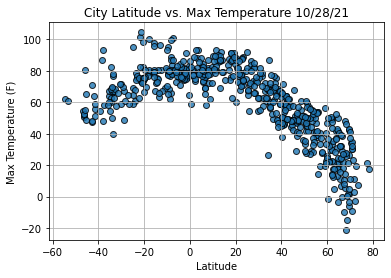

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

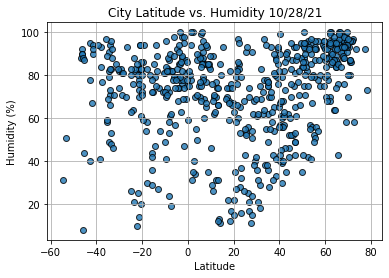

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

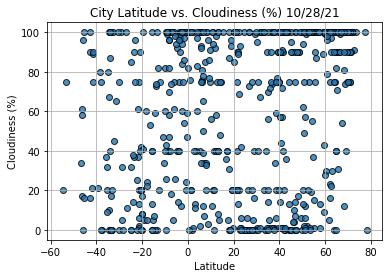

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

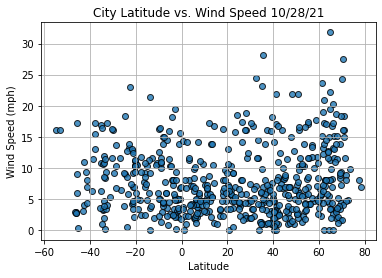

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
index13 = city_data_df.loc[(city_data_df["Lat"] >= 0)]
index13

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
3,Tura,IN,2021-10-28 18:33:59,25.5198,90.2201,67.08,91,0,3.91
5,Komsomolskiy,UZ,2021-10-28 18:37:59,40.4272,71.7189,50.72,57,100,4.61
7,Kamenka,RU,2021-10-28 18:37:59,51.3223,42.7678,44.33,92,100,10.31
8,Acapulco,MX,2021-10-28 18:34:55,16.8634,-99.8901,87.62,70,40,2.30
11,Norman Wells,CA,2021-10-28 18:38:01,65.2820,-126.8329,21.24,86,90,3.44
...,...,...,...,...,...,...,...,...,...
573,Yerofey Pavlovich,RU,2021-10-28 18:41:01,53.9667,121.9667,32.59,79,100,1.81
576,Jinchang,CN,2021-10-28 18:41:03,38.4953,102.1739,44.58,41,6,6.40
579,Basse,DE,2021-10-28 18:41:04,52.5518,9.5069,55.78,75,20,10.36
580,Kolyshley,RU,2021-10-28 18:41:04,52.7005,44.5367,44.11,92,100,10.65


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

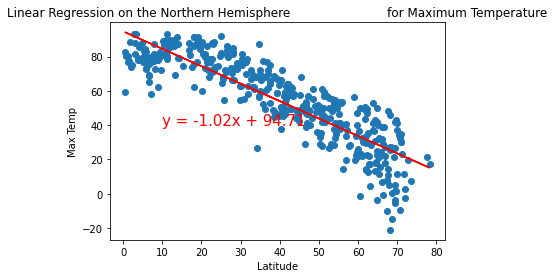

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

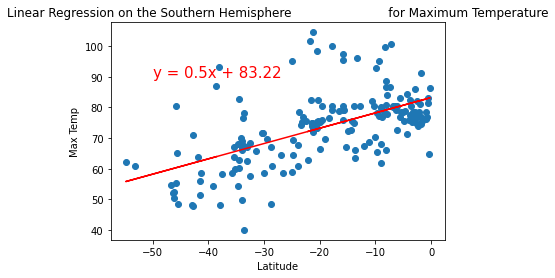

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

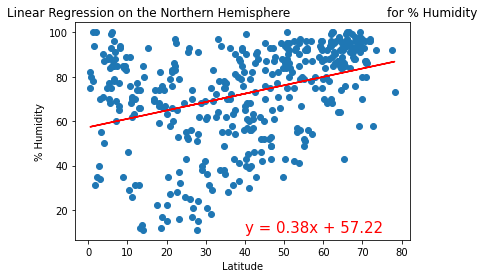

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

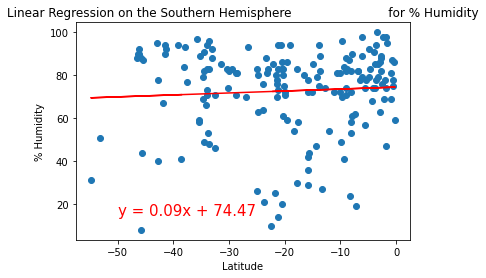

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

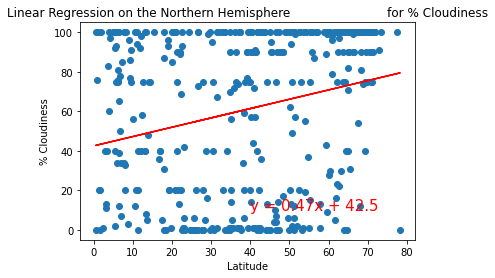

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

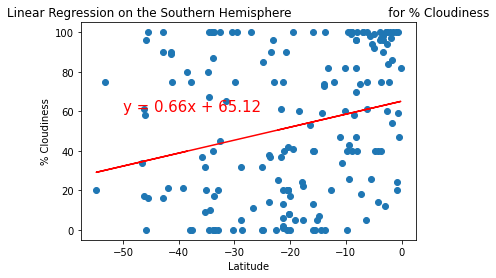

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))